In [33]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns

movies = pd.read_csv('movie.csv')

movies['genres'] = movies['genres'].str.split('|')
mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(movies['genres'])

genres_df = pd.DataFrame(genre_matrix, columns=mlb.classes_, index=movies.index)

print(genres_df.head())


   (no genres listed)  Action  Adventure  Animation  Children  Comedy  Crime  \
0                   0       0          1          1         1       1      0   
1                   0       0          1          0         1       0      0   
2                   0       0          0          0         0       1      0   
3                   0       0          0          0         0       1      0   
4                   0       0          0          0         0       1      0   

   Documentary  Drama  Fantasy  Film-Noir  Horror  IMAX  Musical  Mystery  \
0            0      0        1          0       0     0        0        0   
1            0      0        1          0       0     0        0        0   
2            0      0        0          0       0     0        0        0   
3            0      1        0          0       0     0        0        0   
4            0      0        0          0       0     0        0        0   

   Romance  Sci-Fi  Thriller  War  Western  
0        0 

cluster
1    10311
2     5710
4     4759
0     3653
3     2845
Name: count, dtype: int64


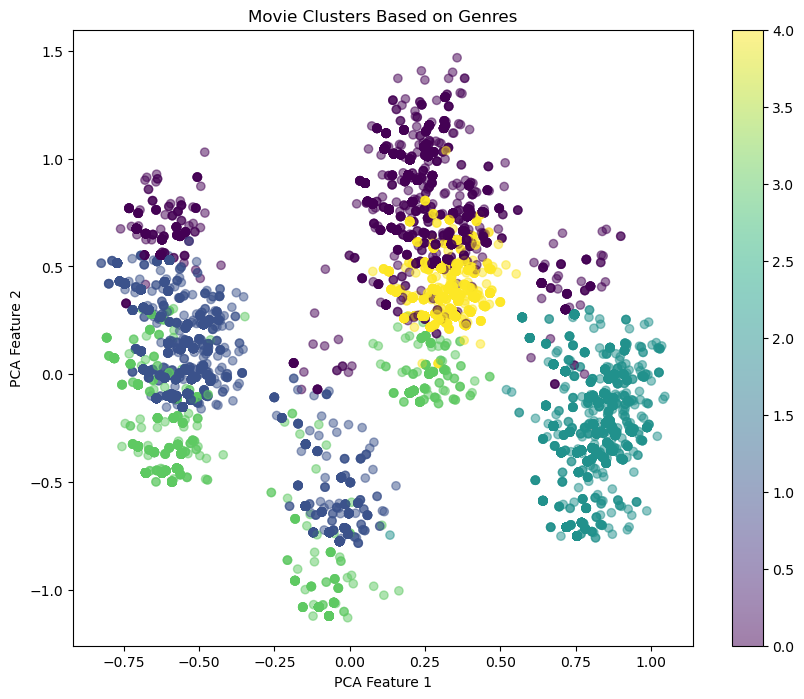

In [34]:
k = 5

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(genres_df)

movies['cluster'] = kmeans.labels_

print(movies['cluster'].value_counts())

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_genres = pca.fit_transform(genres_df)
plt.figure(figsize=(10, 8))
plt.scatter(reduced_genres[:,0], reduced_genres[:,1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.title('Movie Clusters Based on Genres')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar()
plt.show()


In [41]:
genre_columns = movies.columns[2:-1]

for i in range(0,5):
    cluster_id = i
    cluster_movies = movies[movies['cluster'] == cluster_id]

    top_genres = cluster_movies[genre_columns].sum().sort_values(ascending=False)
    print("Top Genres in Cluster {}:".format(cluster_id))
    print(top_genres.head(5))

    print("\nSample Movies in this Cluster:")
    print(cluster_movies['title'].sample(10)) 

Top Genres in Cluster 0:
genres    [Action, Crime, Thriller, Action, Action, Adve...
dtype: object

Sample Movies in this Cluster:
7623     Dark Water (Honogurai mizu no soko kara) (2002)
7365                                    Dobermann (1997)
22492                        The Valley of Gwangi (1969)
4427                                   Masquerade (1988)
5485                               Devil Bat, The (1940)
22079                             Super Cops, The (1974)
12340                 Battlestar Galactica: Razor (2007)
26767                                Hollow Point (1996)
11218                            Bon Cop, Bad Cop (2006)
17217     Destroy All Monsters (Kaijû sôshingeki) (1968)
Name: title, dtype: object
Top Genres in Cluster 1:
genres    [Drama, Crime, Drama, Drama, Sci-Fi, Drama, Ch...
dtype: object

Sample Movies in this Cluster:
122        Star Maker, The (Uomo delle stelle, L') (1995)
18296                               Violet & Daisy (2011)
7779                     

The average rating across all movies is: 3.53


C:\Users\derek\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


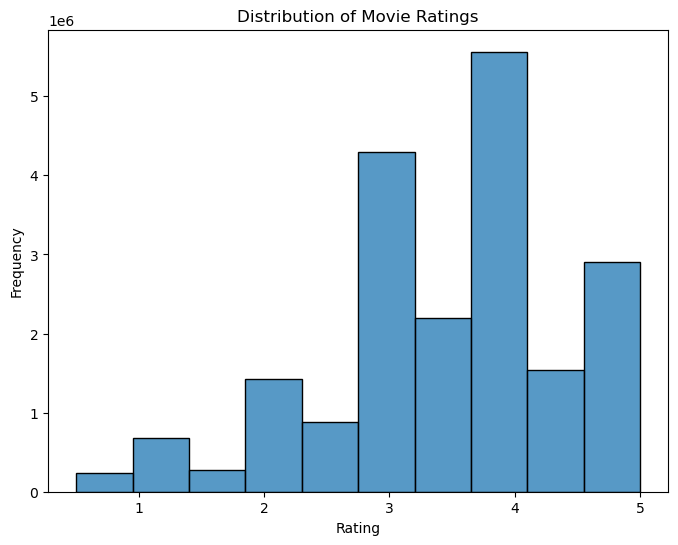

In [40]:
ratings = pd.read_csv('rating.csv')
data = pd.merge(ratings, movies, on='movieId')
average_rating = data['rating'].mean()
print(f"The average rating across all movies is: {average_rating:.2f}")
plt.figure(figsize=(8, 6))
sns.histplot(data['rating'], bins=10, kde=False)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()